In [1]:
from GenMesh_WaveFront import *

In [2]:
domain = Domain_3D()
domain.loadMesh()
N_nodes = len(domain.nodes)
coors_nodes = npA([nd.coor for nd in domain.nodes])
idx_boundaryNode = sorted({nd.i for f in domain.elements_2D for nd in f.nodes if len(f.volumes) == 1})
idx_insideNode = np.delete(range(len(domain.nodes)), idx_boundaryNode)
print("idx_boundaryNode\n", idx_boundaryNode)
print("idx_insideNode\n", idx_insideNode)

Nodes in mesh:
 [N0, N1, N2, N3, N4, N5, N6, N7, N8, N9, N10, N11, N12, N13, N14, N15, N16, N17, N18, N19, N20, N21, N22, N23, N24, N25, N26, N27, N28, N29, N30, N31, N32, N33, N34, N35, N36, N37, N38, N39, N40, N41, N42, N43, N44, N45, N46, N47, N48, N49, N50, N51, N52, N53, N54, N55, N56, N57, N58, N59, N60, N61, N62, N63, N64, N65, N66, N67, N68]
	Add active face F19-31-63
	Add active face F31-53-63
	Add active face F19-31-53
	Add active face F19-53-63
After check, faces_active: 4 4
	Add active face F33-53-63
	Add active face F19-33-53
	Add active face F19-33-63
		Remove active face F19-53-63
After check, faces_active: 6 7
	Add active face F19-47-63
	Add active face F31-47-63
	Add active face F19-31-47
		Remove active face F19-31-63
After check, faces_active: 8 10
	Add active face F2-7-55
	Add active face F2-33-55
	Add active face F7-33-55
	Add active face F2-7-33
After check, faces_active: 12 14
	Add active face F0-7-55
	Add active face F0-33-55
	Add active face F0-7-33
		Remove ac

		Remove active face F5-16-22
		Remove active face F5-22-30
After check, faces_active: 148 196
	Add active face F16-24-52
	Add active face F5-16-52
	Add active face F5-24-52
		Remove active face F5-16-24
After check, faces_active: 150 199
	Add active face F1-21-46
	Add active face F1-21-59
	Add active face F21-46-59
	Add active face F1-46-59
After check, faces_active: 154 203
	Add active face F1-18-46
		Remove active face F1-21-46
		Remove active face F18-21-46
		Remove active face F1-18-21
After check, faces_active: 152 204
	Add active face F5-24-28
	Add active face F24-28-52
	Add active face F5-28-52
		Remove active face F5-24-52
After check, faces_active: 154 207
	Add active face F3-28-52
		Remove active face F3-5-28
		Remove active face F5-28-52
		Remove active face F3-5-52
After check, faces_active: 152 208
	Add active face F28-52-60
		Remove active face F3-28-52
		Remove active face F3-52-60
		Remove active face F3-28-60
After check, faces_active: 150 209
	Add active face F48-50-

	Add active face F3-32-52
		Remove active face F3-52-54
		Remove active face F3-32-54
		Remove active face F32-52-54
After check, faces_active: 148 336
	Add active face F3-32-68
		Remove active face F3-32-52
		Remove active face F32-52-68
		Remove active face F3-52-68
After check, faces_active: 146 337
	Add active face F0-4-5
		Remove active face F0-5-64
		Remove active face F4-5-64
		Remove active face F0-4-64
After check, faces_active: 144 338
	Add active face F0-4-68
	Add active face F0-5-68
		Remove active face F4-5-68
		Remove active face F0-4-5
After check, faces_active: 144 340
	Add active face F0-32-68
		Remove active face F0-5-68
		Remove active face F0-5-32
		Remove active face F5-32-68
After check, faces_active: 142 341
	Add active face F0-3-68
		Remove active face F3-32-68
		Remove active face F0-32-68
		Remove active face F0-3-32
After check, faces_active: 140 342
	Add active face F3-4-68
		Remove active face F0-4-68
		Remove active face F0-3-68
		Remove active face F0-3-4

<IPython.core.display.Javascript object>


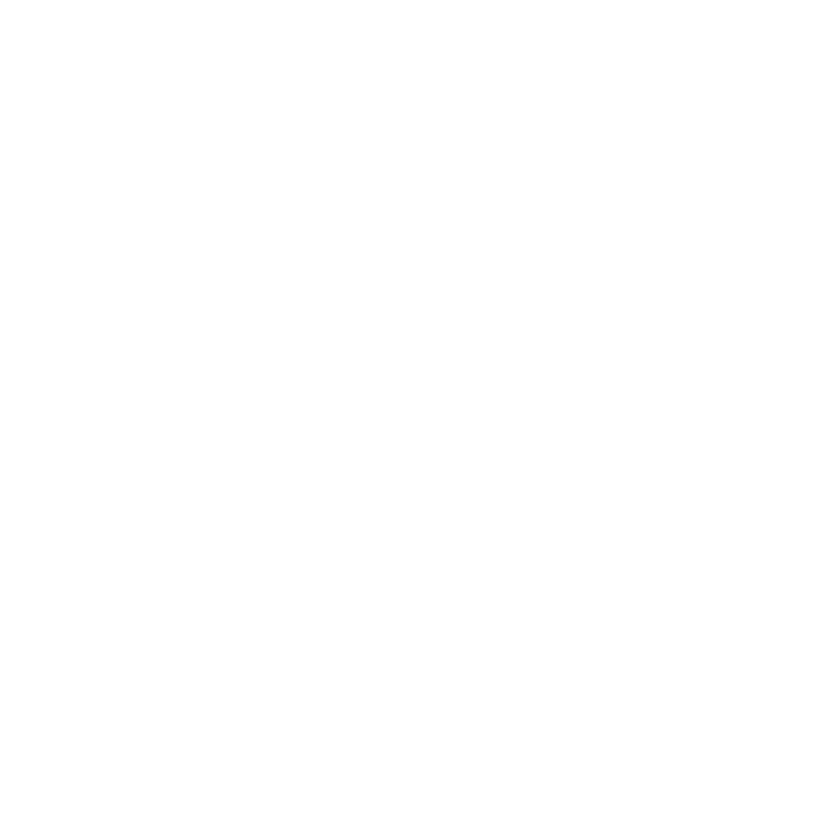

In [3]:
%matplotlib notebook
ax = (fig := plt.figure()).add_subplot(projection="3d")
fig.set_size_inches(6, 6)

ax.scatter(*coors_nodes.T)
for i, c in enumerate(coors_nodes): ax.text(*c, i)
    
domain.plotAllEdges(ax, lw=0.2)

\begin{equation}
\int_\Omega \nabla \psi_i \cdot \nabla \psi_j dV \equiv \alpha_{ij} = \alpha_{ji} \\
\int_{\partial \Omega} \psi_i \nabla \psi_j \cdot d\hat{S} \equiv \beta_{ij} \neq \beta_{ji} \\
\int_\Omega \psi_i \psi_j dV \equiv \gamma_{ij} = \gamma_{ji} \\
\int_{\partial \Omega} \psi_i \psi_j dS \equiv \epsilon_{ij} = \epsilon_{ji}
\end{equation}

In [4]:
arr_Vi_Vj_IntoverArea = domain.getArr_scalarProducts_IntoverVolume_Linear(ViVj_not_gradVigradVj=True)
arr_gradVi_gradVj_IntoverArea = domain.getArr_scalarProducts_IntoverVolume_Linear(ViVj_not_gradVigradVj=False)
arr_Vi_Vj_IntoverEdge = domain.getArr_Product_IntoverFace_Linear(VigradVj_dot_normal_not_ViVj=False)
arr_Vi_gradVj_IntoverEdge = domain.getArr_Product_IntoverFace_Linear(VigradVj_dot_normal_not_ViVj=True)

<IPython.core.display.Javascript object>


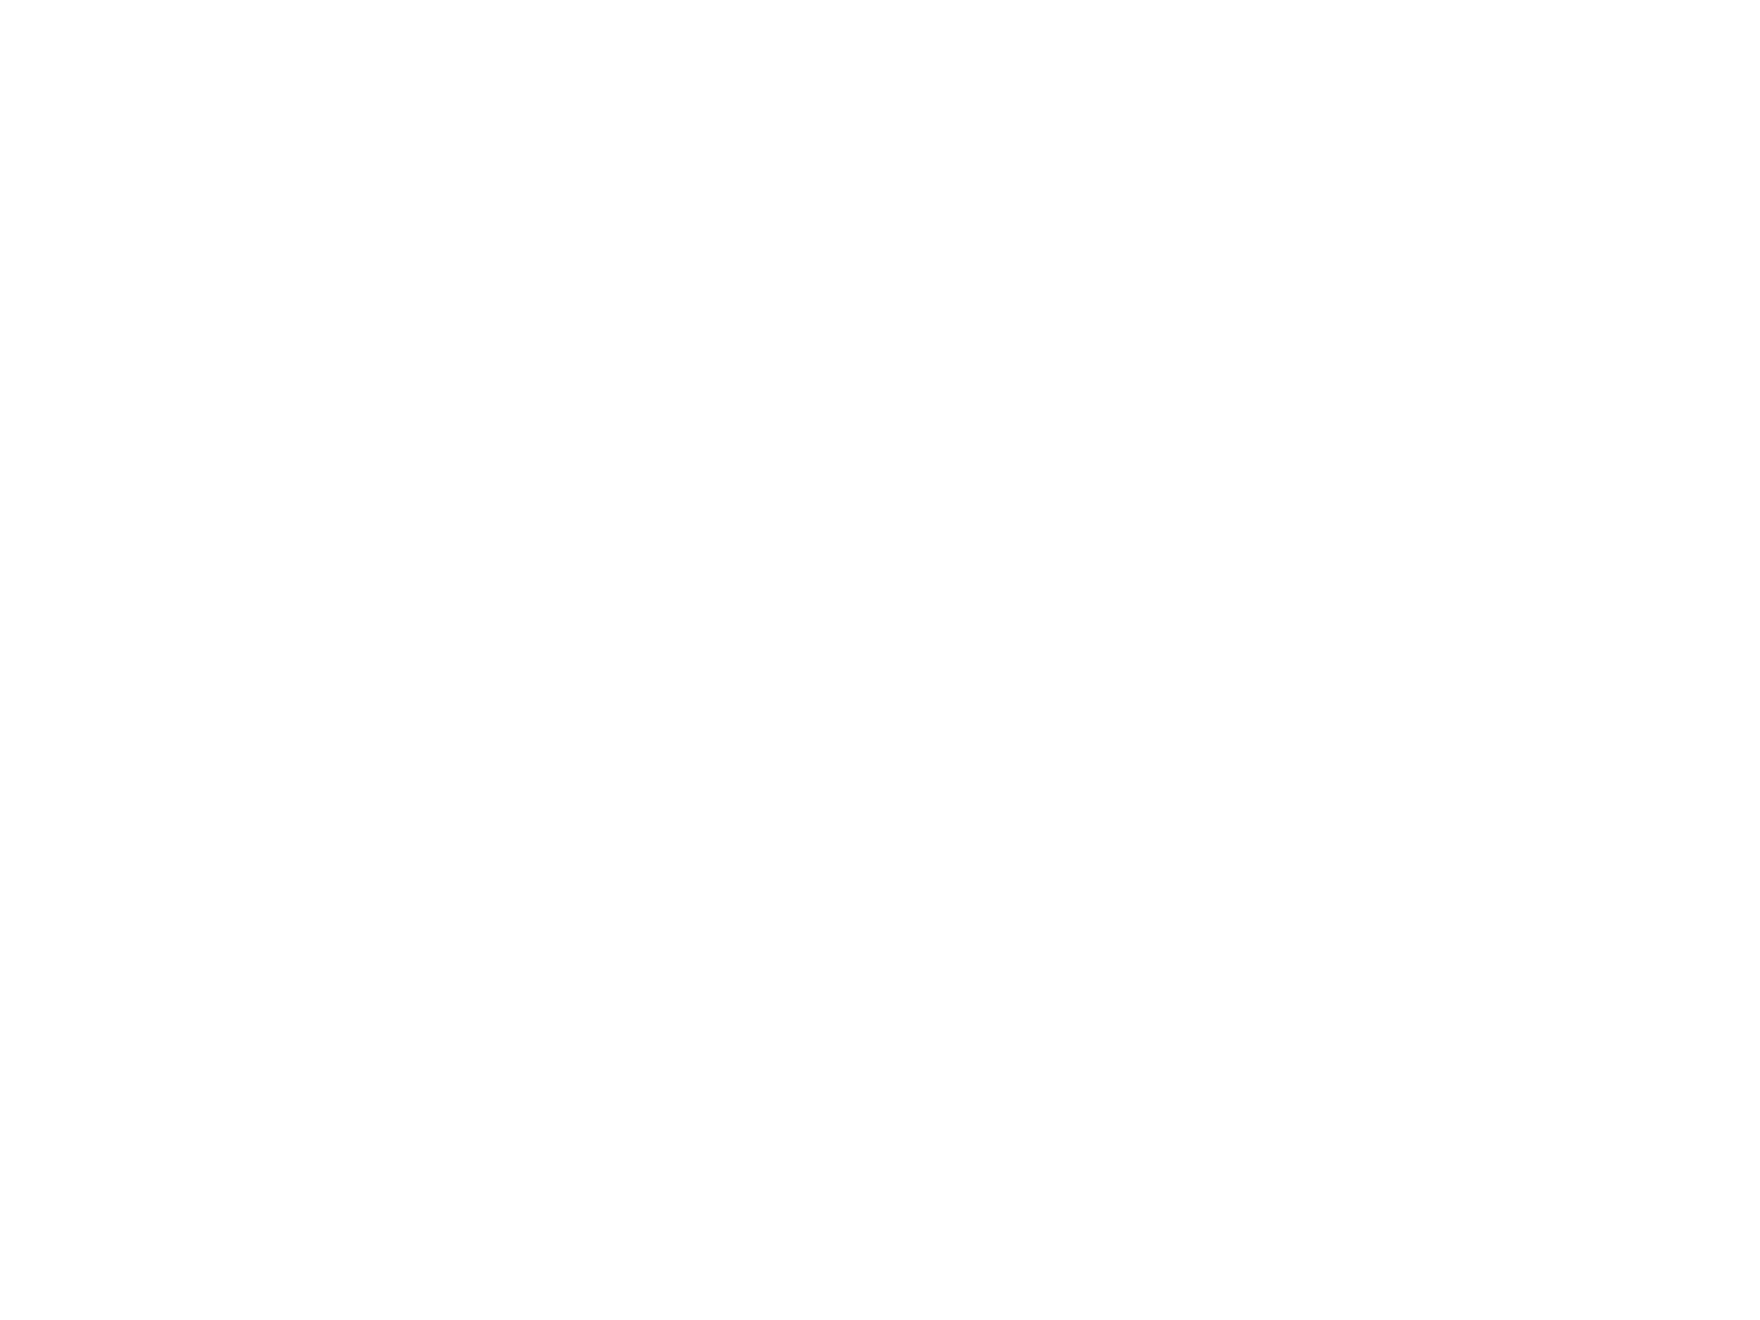

In [5]:
#fig, ((ax_Vi_Vj_IntoverArea, ax_gradVi_gradVj_IntoverArea), 
#      (ax_Vi_Vj_IntoverEdge, ax_Vi_gradVj_IntoverEdge)) = plt.subplots(2, 2, dpi=200)
fig, (ax_gradVi_gradVj_IntoverArea, ax_Vi_gradVj_IntoverEdge, ax_Vi_Vj_IntoverArea, ax_Vi_Vj_IntoverEdge) = plt.subplots(1, 4, dpi=200)
axes = (ax_gradVi_gradVj_IntoverArea, ax_Vi_gradVj_IntoverEdge, ax_Vi_Vj_IntoverArea, ax_Vi_Vj_IntoverEdge)


ax_gradVi_gradVj_IntoverArea.imshow(arr_gradVi_gradVj_IntoverArea) #alpha
ax_Vi_gradVj_IntoverEdge.imshow(arr_Vi_gradVj_IntoverEdge) #beta
ax_Vi_Vj_IntoverArea.imshow(arr_Vi_Vj_IntoverArea) #gamma
ax_Vi_Vj_IntoverEdge.imshow(arr_Vi_Vj_IntoverEdge) #epsilon

ax_gradVi_gradVj_IntoverArea.set_title("$\\alpha_{ij}$\ngradVi_gradVj_overArea", size=8)
ax_Vi_gradVj_IntoverEdge.set_title("$\\beta_{ij}$\nVi_gradVj_overEdge", size=8)
ax_Vi_Vj_IntoverArea.set_title("$\\gamma_{ij}$\nVi_Vj_overArea", size=8)
ax_Vi_Vj_IntoverEdge.set_title("$\\epsilon_{ij}$\nVi_Vj_overEdge", size=8)

#for ax in axes: ax.grid()

plt.tight_layout(h_pad=1, w_pad=1)

For basic PDE $-k \nabla^2 T = g(x)$, it is converted into $k(\alpha - \beta) T = AT = \gamma g$, where $g$ has its values well defined (typically 0) on nodes within domain (excluding $\partial \Omega$). For boundary condition where the 

### Boundary definition.
Temps on $\partial \Omega$ are given, both T and g have knowns and unknowns. The total unknown variables still equal the number of nodes. Need to move the part of unknown g to LHS, and known T to RHS.

In [6]:
#Define the g and Ts. g on boundary will be ignored, and T on inside will be ignored.
g = np.zeros(N_nodes)
T = npNorm(coors_nodes, axis=1)

#fig, ax = plt.subplots(dpi=200)
#fig.set_size_inches(3.2, 3.2)
#ax.set_position([0.12, 0.18, 0.85, 0.8])
#
#domain.textAllNodes(ax, size=4, color="red")
#domain.plotAllEdges(ax, lw=0.2)
#ax.scatter(*coors_nodes[idx_boundaryNode].T, c=T[idx_boundaryNode])

<IPython.core.display.Javascript object>


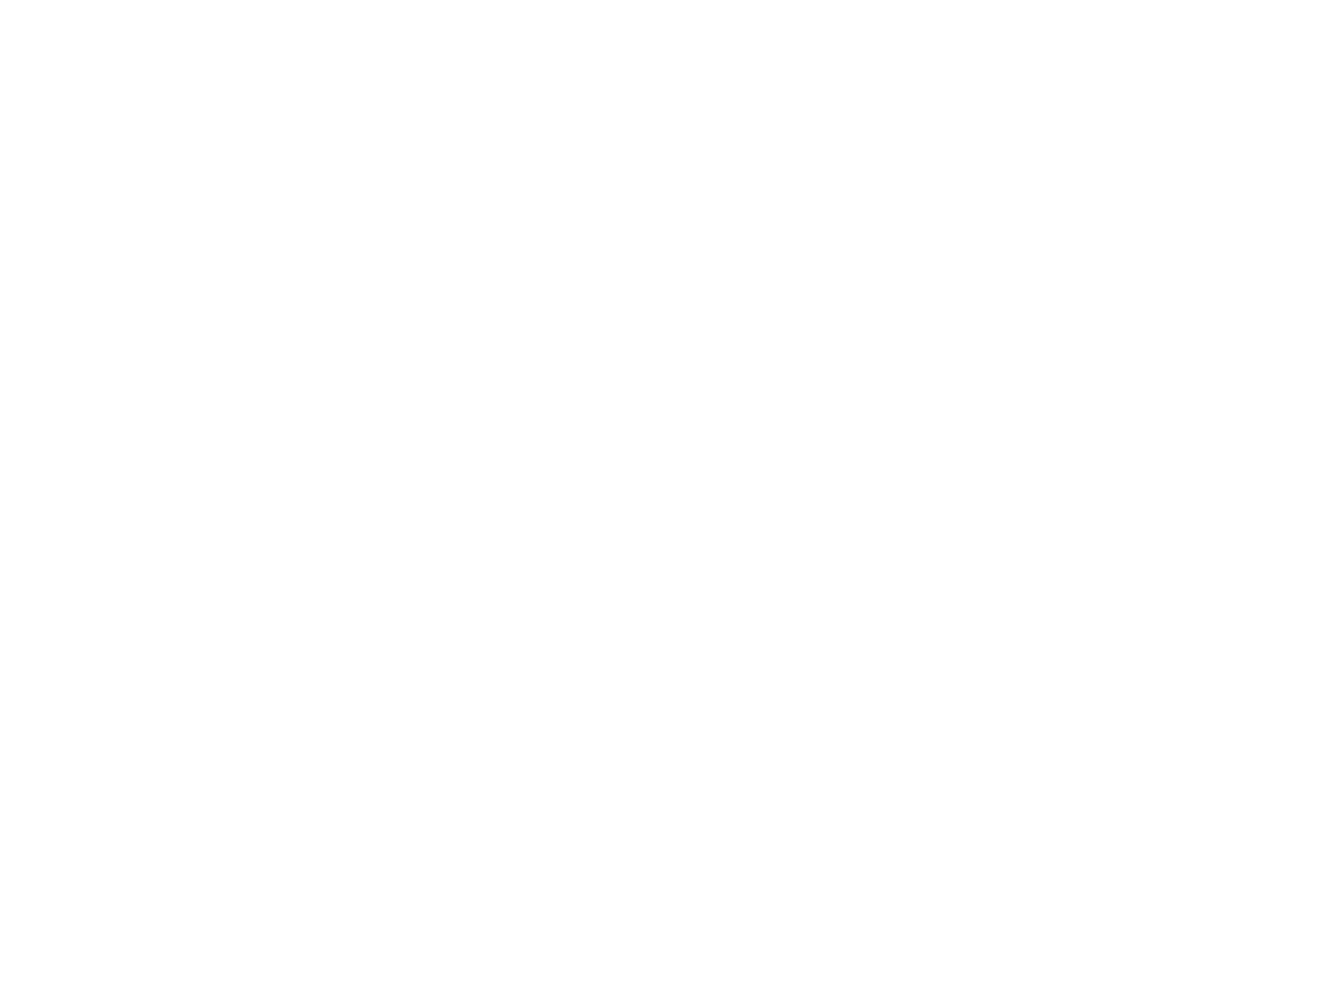

In [7]:
A = arr_gradVi_gradVj_IntoverArea - arr_Vi_gradVj_IntoverEdge
new_A, new_gamma, new_g = A.copy(), arr_Vi_Vj_IntoverArea.copy(), g.copy()

#Exchange known and unknown parts of T and g.
new_A[:,idx_boundaryNode] = arr_Vi_Vj_IntoverArea[:,idx_boundaryNode]
new_gamma[:,idx_boundaryNode] = A[:,idx_boundaryNode]
new_g[idx_boundaryNode] = -T[idx_boundaryNode]

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, dpi=150)
ax1.imshow(A); ax1.set_title("Original A")
ax2.imshow(new_A); ax2.set_title("New A")
ax3.imshow(arr_Vi_Vj_IntoverArea); ax3.set_title("Original gamma")
ax4.imshow(new_gamma); ax4.set_title("New gamma")

plt.tight_layout()

<IPython.core.display.Javascript object>


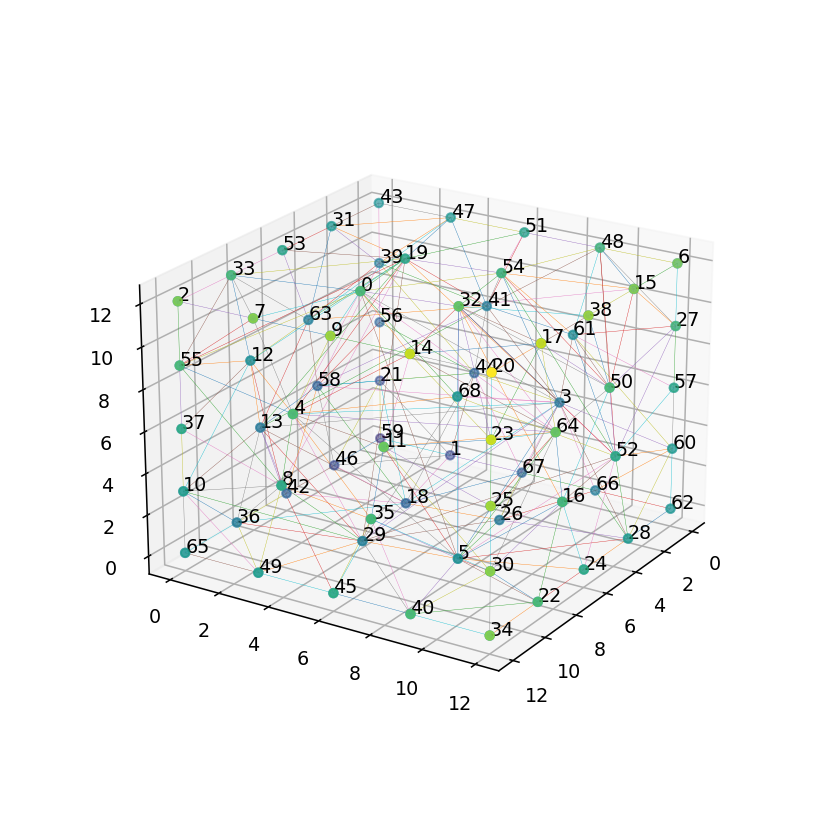

In [8]:
sol = npSolve(new_A, new_gamma@new_g)
T[idx_insideNode] = sol[idx_insideNode]
g[idx_boundaryNode] = -sol[idx_boundaryNode]

%matplotlib notebook
ax = (fig := plt.figure()).add_subplot(projection="3d")
fig.set_size_inches(6, 6)

ax.scatter(*coors_nodes.T)
for i, c in enumerate(coors_nodes): ax.text(*c, i)
    
domain.plotAllEdges(ax, lw=0.2)

ax.scatter(*coors_nodes.T, c=T)